*The report must be prepared individually. You can use the Internet to research the questions, but do not use your findings verbatim; paraphrase them instead. Do not share or copy your report - in case of a suspicion of plagiarism you will lose your points from this report.*

Author: Szymon Czajkowski 156067

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math


In [2]:
class Problem:
    ### to solve a problem using Evolutionary Algorithms, me must define four methods
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # ...we need it to create the initial population!
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # ...we need it to decide which solutions should participate in creating the new population!
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        # ...this is one of the evolutionary operators!
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        # ...this is one of the evolutionary operators!
        return s1[:]
    
    ### additionally, we should define a method that will give us a preview of any given solution s
    def display_solution_param(self, s):
        print(s)

In [3]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=1234):
        # we draw random locations for the cities and we prepare a matrix of distances between them - it will come useful later!
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        # length of the route is equal to the sum of distances between all subsequent cities
        # notice that we include the distance between the first and the last city as well! the route is a loop!
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array in a special way!

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [4]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1234):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    ### DISPLAY (you don't have to read it) ###

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem (class: TSP_Poland). Present the solution (*display_solution()*) and its length (*evaluate()*) for that route and three possible mutations of that route. Repeat that for a new instance of the problem (a new object of the same class). Did the routes change? Why / why not?

-------- Instance 0 --------


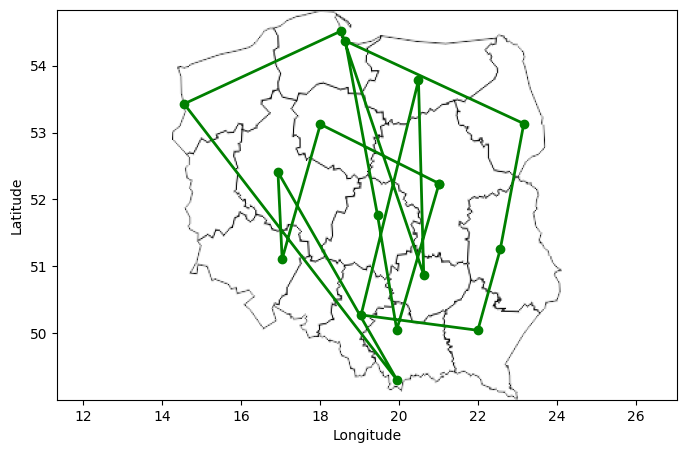

Inital route length: 50.77663510399158


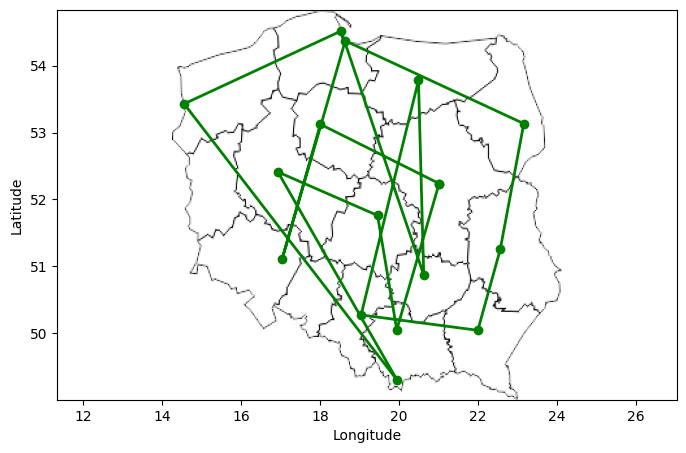

0 mutated route length: 52.97535430027324


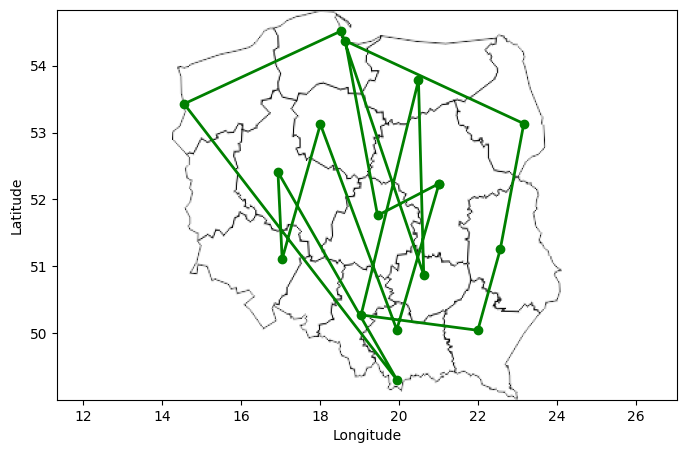

1 mutated route length: 51.126005314424965


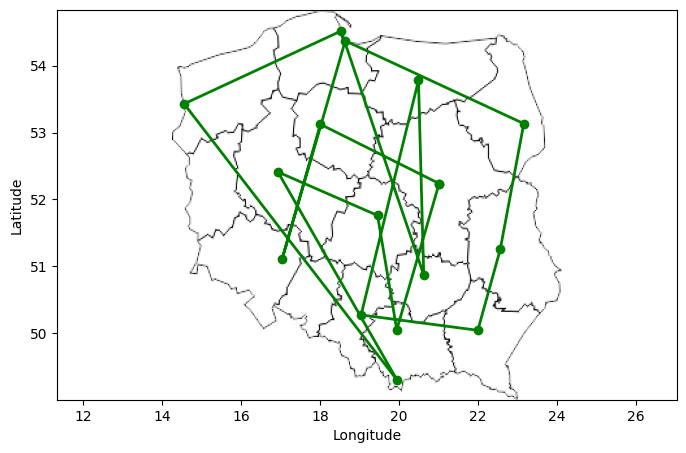

2 mutated route length: 52.97535430027325
-------- Instance 1 --------


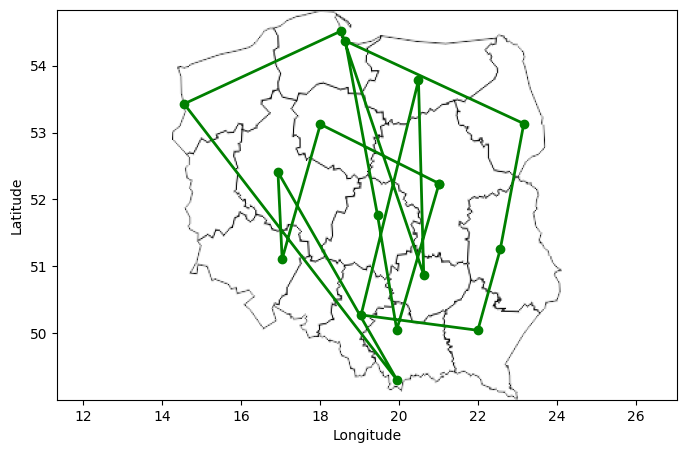

Inital route length: 50.77663510399158


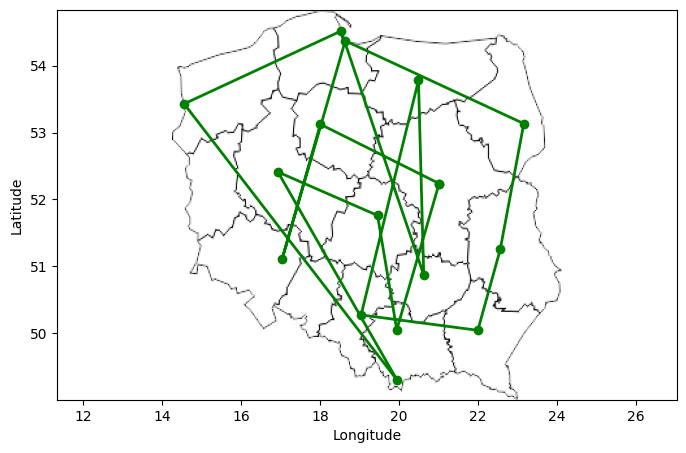

0 mutated route length: 52.97535430027324


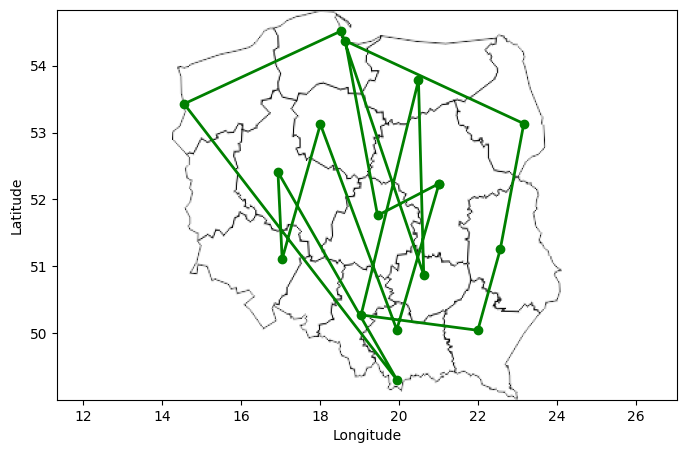

1 mutated route length: 51.126005314424965


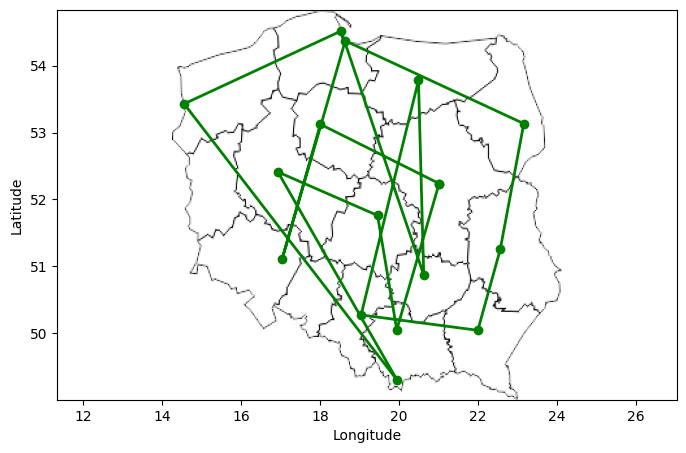

2 mutated route length: 52.97535430027325


In [5]:
for i in range(2):
    tsp = TSP_Poland()
    print(f"-------- Instance {i} --------")
    sample_route = tsp.random_solution()
    tsp.display_solution(sample_route)
    print(f"Inital route length: {tsp.evaluate(sample_route)}")
    for j in range(3):
        mutated_route = tsp.mutate(sample_route)
        tsp.display_solution(mutated_route)
        print(f"{j} mutated route length: {tsp.evaluate(mutated_route)}")


In the scope of one instance the routes differ only slightly since the mutations provide only small changes to the inital solution -> their purpose is to exploit the optimization landscape and not to explore it. The routes don't change between instances of the problem because the same seed is used for both of them.

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluated solutions over 10 runs of the algorithm.

In [11]:
tsp = TSP_Poland()


def random_search_algorithm(number_of_solutions_to_evaluate, number_of_runs = 10):
    best_solutions_after10 = []
    best_solutions_after100 = []
    best_solutions_after1000 = []
    best_solutions_after10000 = []
    for _ in range(number_of_runs):
        current_min_fitness = tsp.evaluate(tsp.random_solution())
        for i in range(2, number_of_solutions_to_evaluate+1): #range is from two since the first solution was already evaluated before
            solution = tsp.random_solution()
            fitness = tsp.evaluate(solution)
            if fitness < current_min_fitness:
                current_min_fitness = fitness
            if i == 10:
                best_solutions_after10.append(current_min_fitness)
            if i == 100:
                best_solutions_after100.append(current_min_fitness)
            if i == 1000:
                best_solutions_after1000.append(current_min_fitness)
            if i == 10000:
                best_solutions_after10000.append(current_min_fitness)
    print(f"Average after 10 random solutions: {sum(best_solutions_after10)/len(best_solutions_after10)}")
    print(f"Average after 100 random solutions: {sum(best_solutions_after100)/len(best_solutions_after100)}")
    print(f"Average after 1000 random solutions: {sum(best_solutions_after1000)/len(best_solutions_after1000)}")
    print(f"Average after 10000 random solutions: {sum(best_solutions_after10000)/len(best_solutions_after10000)}")

random_search_algorithm(10000)


Average after 10 random solutions: 47.87756137782655
Average after 100 random solutions: 43.32554531155182
Average after 1000 random solutions: 40.41149989739358
Average after 10000 random solutions: 37.515755604304566


**Task 3:** Implement a steady-state evolutionary algorithm with tournament selection and random deletion. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate after testing a given number of solutions, or (if the number of solutions to be tested is not given) after 1000 evaluations without improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluated solutions over 10 runs of the algorithm. Does the algorithm find better solutions than random search?  
**Answer:** The evolutionary algorithm finds better solutions than the random search. The reason for that is explained below.
* What is the difference between random search and evolution?  
**Answer:** Evolution leads to obtaining better solutions than random search since it uses reproductive pressure, crossovers (for exploring the optimization landscape) and mutations (for exploiting the optimization landscape). It leads to preserving more preferable solutions and using them while generating new ones, rather than relying on pure luck (as in random search).

In [12]:
tsp = TSP_Poland()

def create_initial_population(size):
    population = []
    for _ in range(size):
        population.append(tsp.random_solution())
    return population

#This function choses random solutions from the population and returns the best of them
def tournament(population, number_of_participants):
    participants = random.sample(population, k=number_of_participants)
    fitness_list = [tsp.evaluate(participant) for participant in participants]
    index_of_best_solution = fitness_list.index(min(fitness_list))
    return participants[index_of_best_solution]

def create_new_solution(population, number_of_participants, probability_of_mutation = 0.6, probability_of_crossover = 0.2):
    new_solution = 0
    if random.random() < probability_of_crossover:
        parent1 = tournament(population, number_of_participants)
        parent2 = tournament(population, number_of_participants)
        new_solution = tsp.crossover(parent1,parent2)[random.randrange(1,2)] #it is necessery to choose randomly from two solutions obtained from crossover
    else: new_solution = tournament(population, number_of_participants)
    if random.random() < probability_of_mutation:
        new_solution = tsp.mutate(new_solution)
    return new_solution

def update_population(population, new_solution):
    del population[random.randrange(len(population))]
    population.append(new_solution)
    return population

def evolutionary_algortihm(number_of_solutions_to_be_tested = 0, number_of_runs = 10, population_size = 20, number_of_participants = 3, probability_of_mutation = 0.6, probability_of_crossover = 0.2):
    best_solutions_after10 = []
    best_solutions_after100 = []
    best_solutions_after1000 = []
    best_solutions_after10000 = []
    if number_of_solutions_to_be_tested == 0:
        total_steps = 0
        for _ in range(number_of_runs):
            number_of_iterations_without_improvements = 0
            population = create_initial_population(population_size)
            current_min_fitness = min([tsp.evaluate(solution) for solution in population])
            step = 1
            while(number_of_iterations_without_improvements<1000):
                new_solution = create_new_solution(population, number_of_participants, probability_of_mutation, probability_of_crossover)
                new_solution_fitness = tsp.evaluate(new_solution)
                population = update_population(population, new_solution)
                if new_solution_fitness < current_min_fitness:
                    current_min_fitness = new_solution_fitness
                    number_of_iterations_without_improvements = 0
                else:
                    number_of_iterations_without_improvements += 1
                if step == 10:
                    best_solutions_after10.append(current_min_fitness)
                if step == 100:
                    best_solutions_after100.append(current_min_fitness)
                if step == 1000:
                    best_solutions_after1000.append(current_min_fitness)
                if step == 10000:
                    best_solutions_after10000.append(current_min_fitness)
                step += 1
            total_steps += step
        print(f"Average number of iterations before termination: {total_steps/number_of_runs}")
       
    else:
        for _ in range(number_of_runs):
            population = create_initial_population(population_size)
            current_min_fitness = min([tsp.evaluate(solution) for solution in population])
            for i in range(1,number_of_solutions_to_be_tested+1):
                new_solution = create_new_solution(population, number_of_participants, probability_of_mutation, probability_of_crossover)
                new_solution_fitness = tsp.evaluate(new_solution)
                population = update_population(population, new_solution)
                if new_solution_fitness < current_min_fitness:
                    current_min_fitness = new_solution_fitness
                if i == 10:
                    best_solutions_after10.append(current_min_fitness)
                if i == 100:
                    best_solutions_after100.append(current_min_fitness)
                if i == 1000:
                    best_solutions_after1000.append(current_min_fitness)
                if i == 10000:
                    best_solutions_after10000.append(current_min_fitness)
                
    print(f"Average after 10 iterations: {sum(best_solutions_after10)/len(best_solutions_after10)}" if len(best_solutions_after10) != 0 else f"Algorithm terminated before obtaining enough solutions to display the average")
    print(f"Average after 100 iterations: {sum(best_solutions_after100)/len(best_solutions_after100)}" if len(best_solutions_after100) != 0 else f"Algorithm terminated before obtaining enough solutions to display the average")
    print(f"Average after 1000 iterations: {sum(best_solutions_after1000)/len(best_solutions_after1000)}" if len(best_solutions_after1000) != 0 else f"Algorithm terminated before obtaining enough solutions to display the average")
    print(f"Average after 10000 iterations: {sum(best_solutions_after10000)/len(best_solutions_after10000)}" if len(best_solutions_after10000) != 0 else f"Algorithm terminated before obtaining enough solutions to display the average")

evolutionary_algortihm(10000)




    

Average after 10 iterations: 46.71900824615821
Average after 100 iterations: 40.122025492873654
Average after 1000 iterations: 29.471605116671327
Average after 10000 iterations: 27.230171100970814


**Task 4:** Perform some experiments using different instance sizes (10, 50, 200 and 500 cities) for the TSP problem (class: TSP). Use $N=50$, $t=3$, $p_m=0.8$ and $p_c=0.2$ as the default parameters and change values of only one parameter at a time. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

In [10]:
for instance_size in [10,50,200,500]:
    print(f"-------- Current instance size is: {instance_size} --------")
    tsp = TSP(cities = instance_size)
    print(f"-------- POPULATION SIZE TESTS --------")
    for N in [10,20,50,100,200]:
        print(f"Tested POPULATION SIZE: {N} ")
        evolutionary_algortihm(number_of_runs = 10, population_size = N, number_of_participants = 3, probability_of_mutation = 0.8, probability_of_crossover = 0.2)
    
    print(f"-------- TOURNAMENT SIZE TESTS --------")
    for t in [1,3,5,7,9]:
        print(f"Tested TOURNAMENT SIZE: {t}")
        evolutionary_algortihm(number_of_runs = 10, population_size = 50, number_of_participants = t, probability_of_mutation = 0.8, probability_of_crossover = 0.2)
        print(N)
    
    print(f"-------- MUTATION PROBABILITY TESTS --------")
    for pm in [0.1,0.3,0.5,0.8,0.9]:
        print(f"MUTATION PROBABILITY: {pm}")
        evolutionary_algortihm(number_of_runs = 10, population_size = 50, number_of_participants = 3, probability_of_mutation = pm, probability_of_crossover = 0.2)

    print(f"-------- CROSSOVER PROBABILITY TESTS --------")
    for pc in [0.1,0.2,0.4,0.6,0.8]:
        print(f"CROSSOVER PROBABILITY: {pc}")
        evolutionary_algortihm(number_of_runs = 10, population_size = 50, number_of_participants = 3, probability_of_mutation = 0.8, probability_of_crossover = pc)
    


-------- Current instance size is: 10 --------
-------- POPULATION SIZE TESTS --------
Tested POPULATION SIZE: 10 
Average number of iterations before termination: 1623.8
Average after 10 iterations: 4.620472754534959
Average after 100 iterations: 3.650654635369116
Average after 1000 iterations: 3.053787032286926
Algorithm terminated before obtaining enough solutions to display the average
Tested POPULATION SIZE: 20 
Average number of iterations before termination: 1842.8
Average after 10 iterations: 4.38589318767834
Average after 100 iterations: 3.801292083099232
Average after 1000 iterations: 3.025488784220529
Algorithm terminated before obtaining enough solutions to display the average
Tested POPULATION SIZE: 50 
Average number of iterations before termination: 2402.7
Average after 10 iterations: 4.339821095849837
Average after 100 iterations: 3.757009826041447
Average after 1000 iterations: 3.0219396410346335
Algorithm terminated before obtaining enough solutions to display the ave

The optimal parameters are different for small and big instances of TSP. They have to be properly adjusted for different sizes of the instance and the choices influence the results significantly.

It is clearly visible that the number of iterations before the termination of the algorithm is substantially dependent on the values of tested parameters.  

The **population size** has to be dependent on the size of the instance to provide optimal initial diversity in the population. Without proper adjustments, the quality of the solutions drops significantly. Too small population can lead to too quick convergence (and not finding the best solutions) and too big one unnecessarily prolongs the convergence process or even leads to converging in a less optimal area.  

The **tournament size** defines how big selective pressure is. It also has to be adjusted to different sizes of the problem. Too small pressure leads to fast convergence by giving worse solutions a chance to reproduce often and create inferior offsprings that don't lead to improvement, and too big one results in substantially increasing the convergence time and in some cases losing diversity fast which can result in converging in less optimal area of the optimization landscape. During the experiment, larger tournament sizes led to obtaining far better solutions in most cases.  

Too high **mutation probability** leads to terminating faster and in less optimal areas of the optimization landscape due to a high chance of creating inferior solutions in the process, by introducing too many random changes to the solutions. Too low one also results in worse quality of the solutions because of too little exploitation of the optimization landscape.
 
Too high **crossover probability** leads to losing diversity fast and fast convergence, often in a not optimal area of the optimization landscape. Too little one can lead to not exploring wide areas of the landscape and converging in a local optimum. The value must be dependent on the size and kind of problem that the algorithm is dealing with.

**Task 5:**

Answer the questions in your own words:

1. What is the role of a mutation operator in evolutionary algorithms?  
**Answer:** Mutation operator is used to exploit already visited areas of the optimization landscape -> Find better solutions in the neighbourhood of the ones that were already found
* What are the properties of a good mutation operator?  
**Answer:** Good mutation operator:
	- Produces solutions similar to the given one
	- Introduces changes randomly
	- Is easy to perform
* What is the role of a crossover operator in evolutionary algorithms?  
**Answer:** Crossover operator is used to explore the optimization landscape and make greater changes in the genotypes of the population. It allows for finding better areas of the optimization landscape rather than converging in the nearest local optimum
* What are the properties of a good crossover operator?  
**Answer:** Good crossover operator:
	- Allows for the creation of solutions very different from the parents
	- Creates solutions that preserve good features of the parents
	- Is not random
* What does it mean for the population to converge?  
**Answer:** Population convergence is the process of becoming more and more homogeneous. It often occurs when the algorithm finds a very good solution and other individuals starts to become more and more similar to it.
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?  
**Answer:** The speed of convergence depends on many factors but generally speaking:
	- High population size, low selection pressure (that depends mainly on the size of the tournament), moderate mutation probability and low crossover probability slow the convergence process down since the solutions in the population are quite different from each other for a long time (high initial diversity, high chance of low fitness solution to be selected as a parent, often [but not too frequently] performed mutations providing more diversity [without providing too many random changes that lead to decrease in quality] and a low number of crossovers [which if performed frequently over the long run lead to losing diversity])
	- Low population size, high selection pressure, too high or too low mutation probability and high crossover probability speed the convergence up for the reasons opposite to the ones mentioned above
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?  
**Answer:** Most of the times quicker convergence is correlated with obtaining less optimal solutions. It is because fast convergence leads to not exploring wide areas of the optimization landscape and finding more optimal solutions.
* Can a population escape from a local optimum once it has converged?  
**Answer:** A population can escape from a local optimum after it has converged but it is more difficult than before converging. Implementing some more diversity-increasing techniques in the algorithm, like increasing the number of mutations, makes escaping more probable. Approaches that sometimes accept worse solutions into the population with the hopes of finding better ones after exploring different areas of the optimization landscape have a better chance to achieve this goal.
